32430 25
16875 11
18355 10
19875 11
22044 11
22605 11
22835 11
25213 12
27875 12
29977 14


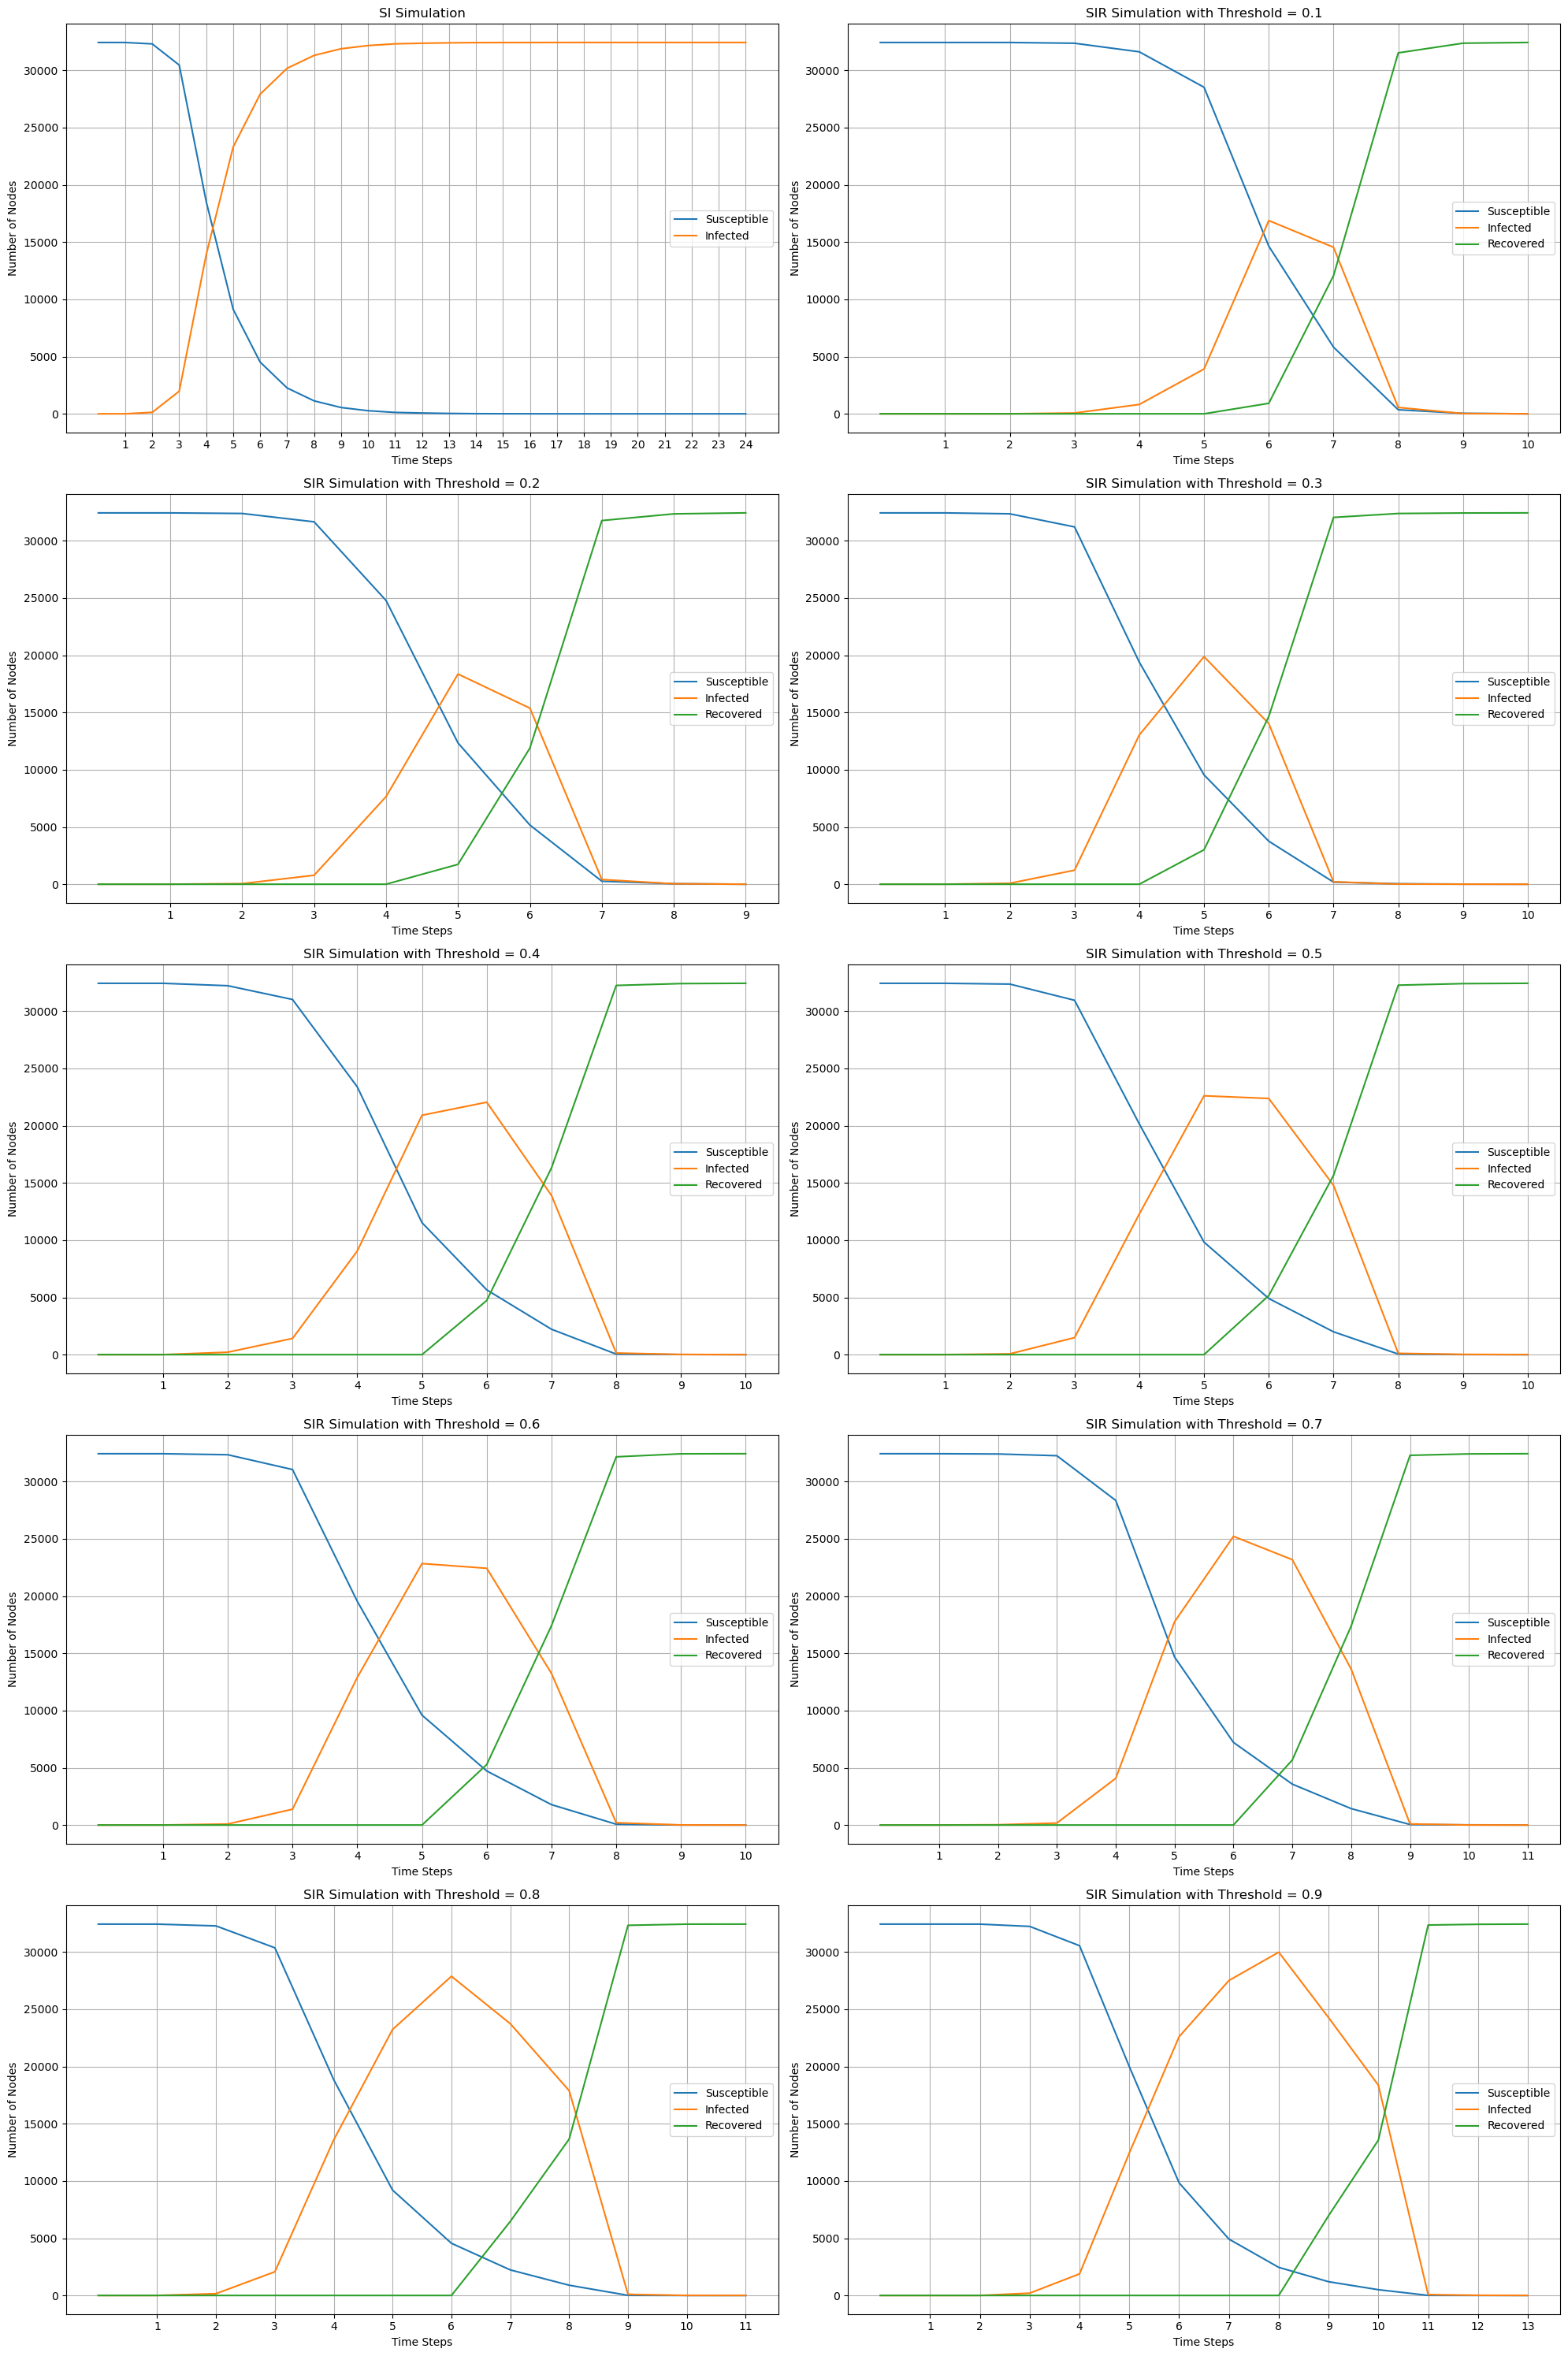

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file and create the graph
file_path = 'data.csv'  # Update with the actual path to your file
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5      # Transmission probability
gamma = 0.23    # Recovery probability
initial_infected = 1
time_steps = 25  # Adjust based on required duration

# Initialize plot
plt.figure(figsize=(20, 30))

# Loop through thresholds from 0.1 to 0.9
for i, recovery_threshold in enumerate(np.arange(0.0, 1.0, 0.1), start=1):
    # Initialize states
    if recovery_threshold == 0.0:
        gamma = 0
    else:
        gamma = 0.23
    nodes = list(G.nodes)
    n = len(nodes)
    infected_nodes = np.random.choice(nodes, replace=False)
    node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
    node_states[infected_nodes] = 'I'
#     node_states[102] = 'R'  # Make sure a node starts as recovered
    
    # Record initial state counts
    susceptible_counts = [n - initial_infected]
    infected_counts = [initial_infected]
    recovered_counts = [0]

    # Simulation loop
    for t in range(1, time_steps):
        new_states = node_states.copy()
        for node in nodes:
            if node_states[node] == 'I':  # Infected node
                # Spread to neighbors
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' and np.random.rand() < beta:
                        new_states[neighbor] = 'I'
                # Recover
                if np.random.rand() < gamma and infected_counts[-1] / n > recovery_threshold:
                    new_states[node] = 'R'
                    
            if node_states[node] == 'R':  # Recovered node spreads immunity
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' or node_states[neighbor] == 'I':
                        new_states[neighbor] = 'R'
        
        # Update states
        node_states = new_states
        susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
        infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
        recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
        
        # Break if no more infected
        if infected_counts[-1] == 0:
            break
    print(max(infected_counts), len(infected_counts))
    # Plot results for the current threshold
    plt.subplot(5, 2, i)
    if recovery_threshold == 0.0:
        plt.title("SI Simulation")
        plt.plot(susceptible_counts, label="Susceptible")
        plt.plot(infected_counts, label="Infected")
        plt.xlabel("Time Steps")
        plt.ylabel("Number of Nodes")
        plt.xticks(ticks = range(1, len(susceptible_counts)))
        plt.legend()
        plt.grid()
    else:
        plt.title(f"SIR Simulation with Threshold = {recovery_threshold:.1f}")
        plt.plot(susceptible_counts, label="Susceptible")
        plt.plot(infected_counts, label="Infected")
        plt.plot(recovered_counts, label="Recovered")
        plt.xlabel("Time Steps")
        plt.ylabel("Number of Nodes")
        plt.xticks(ticks = range(1, len(susceptible_counts)))
        plt.legend()
        plt.grid()

# Adjust layout and display all plots
plt.tight_layout()
plt.show()
